## Overview of Dataset

I will be using the titanic dataset for my extra credit project. I will be using two datasets, train and test.
The train dataset will be used to build mechine learning models. There will be the outcome for each passenger.
For the test dataset, there will be no ground truth to see how my model performs on unseen data.

## Data Dictionary

| Variable  | Definition                                    | Key                                            |
|-----------|-----------------------------------------------|------------------------------------------------|
| survival  |  Survival                                     | 0 = No, 1 = Yes                                | 
| pclass    | Ticket class                                  | 1 = 1st, 2 = 2nd, 3 = 3rd                      | 
| Age       | Age in years                                  |                                                | 
| sibsp     |  # of siblings / spouses aboard the Titanic   |                                                |
| parch     |  # of parents / children aboard the Titanic   |                                                |
| ticket    | Ticket number                                 |                                                |
| fare      | Passenger fare                                |                                                |
| cabin     | Cabin number                                  |                                                |
| embarked  | Port of Embarkation                           | C = Cherbourg, Q = Queenstown, S = Southampton |


## Import Packages

In [3]:
import pandas as pd
import numpy as np
import random as rnd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

## Import Dataset

In [296]:
train_df = pd.read_csv('train.csv')
test_df = pd.read_csv('test.csv')
gender_df = pd.read_csv('gender_submission.csv')

## Assumptions

Before we start, we can make some assumptions,
1. 1st class passengers have a much higher survival rate
2. Women are more likely to survive

## Exploring Dataset

In [5]:
#take a look at our dataset 'train'
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [6]:
#take a look at our dataset 'test'
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


Are values in PassengerID unique?

In [25]:
train_df.PassengerId.nunique() == train_df.shape[0]
# yes, ID in train data are all unique

True

Are values in train and test distinct?

In [26]:
len(np.intersect1d(train_df.PassengerId.values, test_df.PassengerId.values))== 0
#yes, ID values in test and train are distinct.

True

Getting information from our data

In [18]:
train_df.info()
test_df.info()
# we have 2 float64, 5 int64, 5 object
#Survived is taken out in test_df

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
PassengerId    418 non-null int64
Pclass         418 non-null int64
Name           418 non-null object
Sex            418 non-null object
Age            332 non-null float64
SibSp          418 non-null int64
Parch          418 non-null int64
Ticket         418 non-null object
Fare           417 non-null float

Describing our training dataset

In [27]:
train_df.describe()
# We first look at numberic variables
# Our total survive rate is 38%
# Most of the passengers are 2nd, 3rd class passengers
# The mean of age is around 30

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


How many males and females were on board the Titanic?

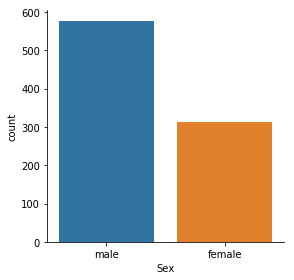

In [56]:
sns.factorplot('Sex',data=train_df,kind='count')
# There are more male than female

How many counts for each class?

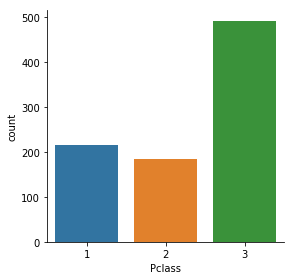

In [55]:
sns.factorplot('Pclass',data=train_df,kind='count')
# We can now get the frequency of each class, with the 3rd class being the largest group.

The gender ratio between groups?

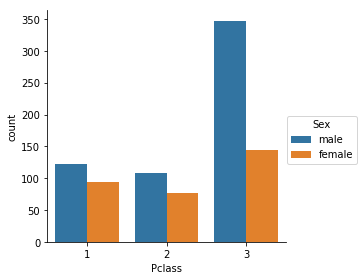

In [59]:
sns.factorplot('Pclass',data=train_df,hue='Sex',kind='count')
# We can see how gender in each class is distributed. 
# There is relatively more men in each group than women.
# Group three has much more men than women.

Distribution of Age

In [297]:
train_random_ages = np.random.randint(train_df['Age'].mean() - train_df['Age'].std(),
                                          train_df['Age'].mean() + train_df['Age'].std(),
                                          size = train_df['Age'].isnull().sum())
train_df['Age'][np.isnan(train_df['Age'])] = train_random_ages
train_df['Age'] = train_df['Age'].astype(int)
train_df.head()
# Cleaned datasets and filled the NAN, then transformed the NAN to numeric

C:\Users\brian\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35,0,0,373450,8.0500,NaN,S


In [298]:
test_random_ages = np.random.randint(test_df['Age'].mean() - test_df['Age'].std(),
                                          test_df['Age'].mean() + test_df['Age'].std(),
                                          size = test_df['Age'].isnull().sum())
test_df['Age'][np.isnan(test_df['Age'])] = test_random_ages
test_df['Age'] = test_df['Age'].astype(int)
test_df.head()

C:\Users\brian\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22,1,1,3101298,12.2875,NaN,S


C:\Users\brian\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


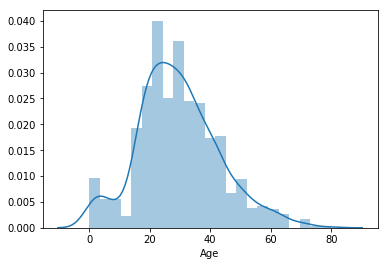

In [179]:
sns.distplot(train_df['Age'])
# We can tell that most of the people are aged between 18 - 40

Distribution of Fare

C:\Users\brian\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


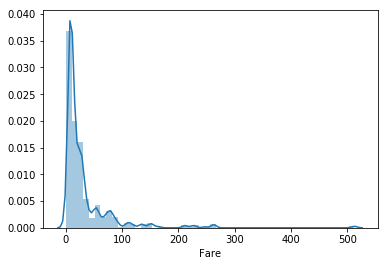

In [29]:
sns.distplot(train_df['Fare'])
# We can see that most of the tickets are below $100, but we have some outliers.

In [28]:
train_df.describe(include=['O'])
# We then look at object variables
# We can tell that there are no duplicating names in our data, with a total of 891 
# There are 577 Male and 314 Female. Male consists of 65% of the population
# There are duplicating cabins, 204 count but 147 unique. We can tell that some passengers are sharring rooms
# There are only three places they embarked from.

,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"Turja, Miss. Anna Sofia",male,1601,B96 B98,S
freq,1,577,7,4,644


How many people embarked from where?

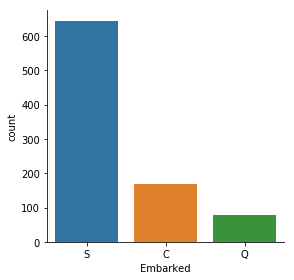

In [60]:
sns.factorplot('Embarked',data=train_df,kind='count')
# Most of the passengers embarked at Southampton

What is the distribution of different classes of where they embarked?

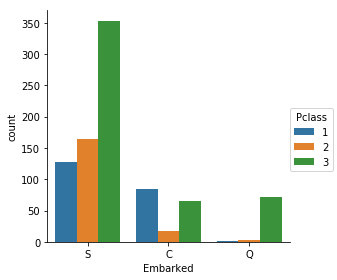

In [62]:
sns.factorplot('Embarked',data=train_df,hue='Pclass',kind='count')
# We can dig deep to find what class embarked at where.
# First class passengers mostly embark at Southampton and Cherbourg.
# Queenstown is mostly embarked by 3rd class passengers.

## Who is going solo?

In [299]:
train_df['Solo'] = train_df.Parch + train_df.SibSp
test_df['Solo'] = test_df.Parch + test_df.SibSp
# We want to get some insights about if a person is going alone or not
# We can get the solo value by adding Parch and SibSp

In [300]:
train_df['Solo'].loc[train_df['Solo']>0] = 'Together'
train_df['Solo'].loc[train_df['Solo'] == 0] = 'Alone'
test_df['Solo'].loc[test_df['Solo']>0] = 'Together'
test_df['Solo'].loc[test_df['Solo'] == 0] = 'Alone'
# 0 means they are going solo, and above means they are going with someone

C:\Users\brian\Anaconda3\lib\site-packages\pandas\core\indexing.py:189: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


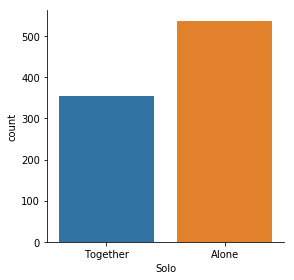

In [209]:
sns.factorplot('Solo',kind='count',data=train_df)
# We can then plot it out to see the distribution.
# We can tell that there are more people going solo.

Let's add the class variable to 'Solo'

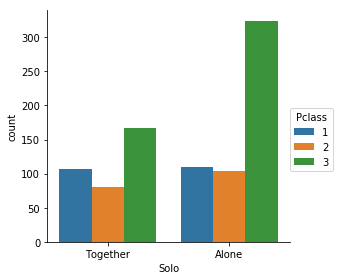

In [77]:
sns.factorplot('Solo',kind='count',data=train_df,hue='Pclass')
# 1st and 2nd class in both categories are about the same, but the third class in Alone had more counts than together.

Pair plot of the Survived variable

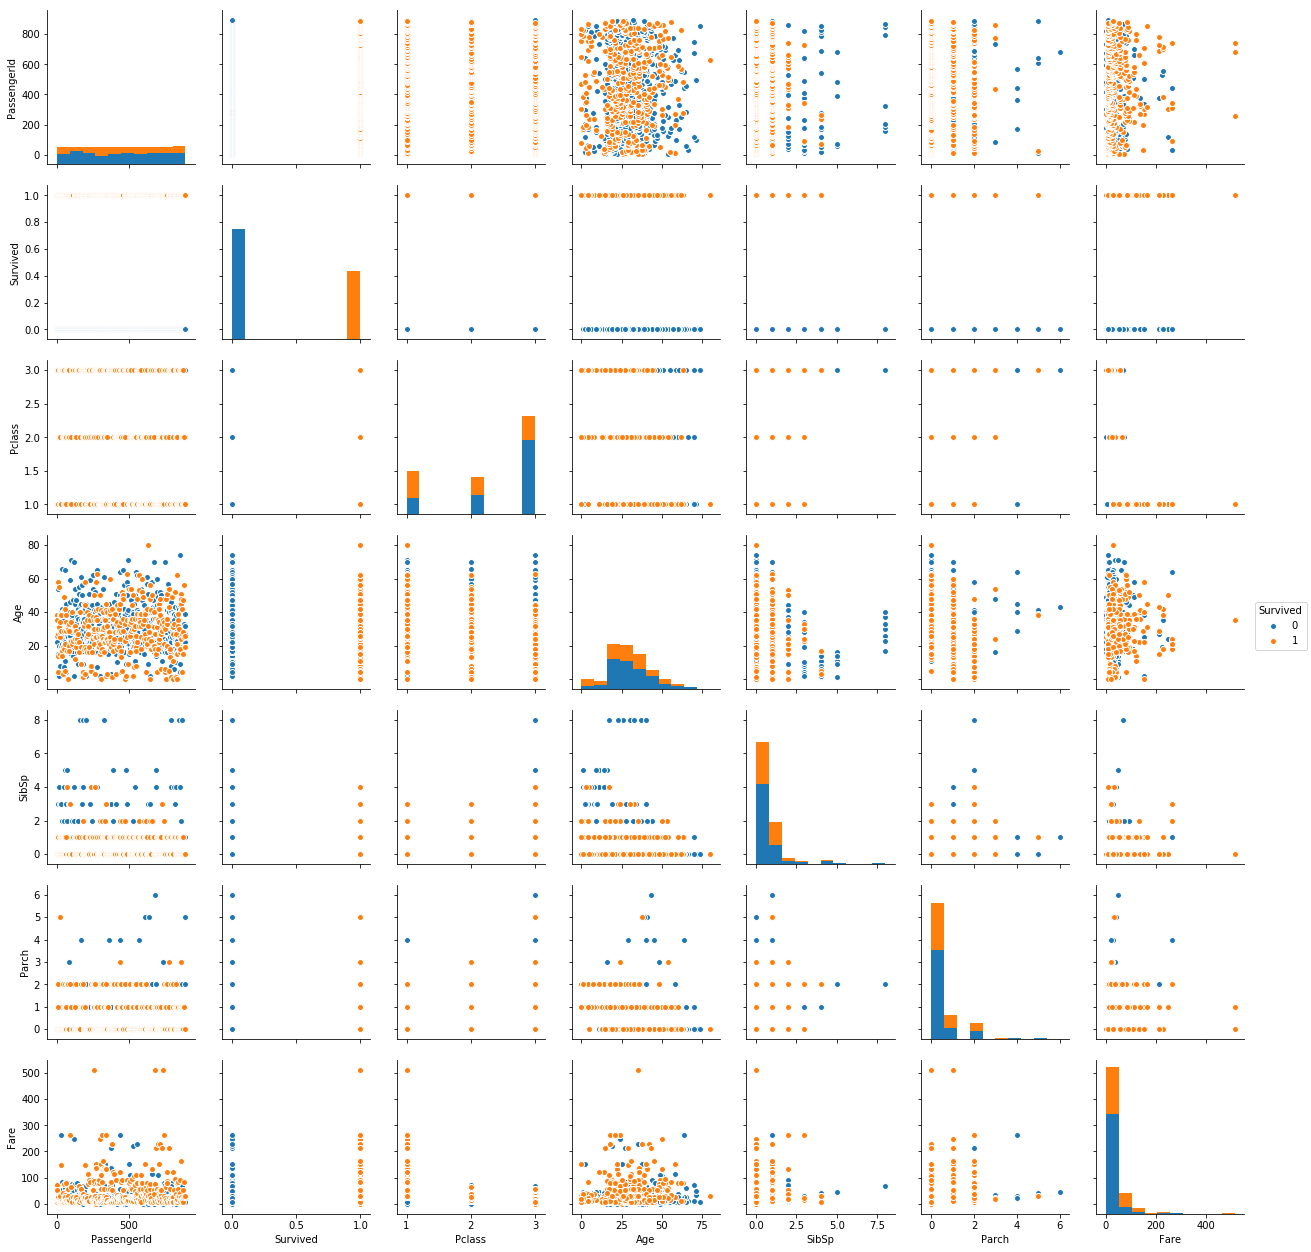

In [87]:
sns.pairplot(train_df, hue = 'Survived')
# Here's a pairplot of the variable Survived, with 0 being dead and 1 being survived.
# We can get a general idea of how dead and survived are distributed in each variable.

How many survived, and how many didn't?

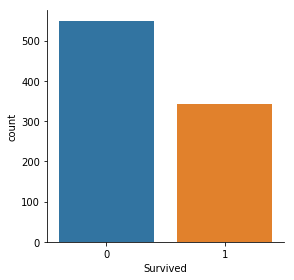

In [78]:
sns.factorplot('Survived',data=train_df,kind='count')
# We can see the frequency of survival, 1 being survived and 0 being dead.

Get to know the survival rate by gender

In [79]:
train_df.groupby('Sex')[['Survived']].mean()
#Female had a 74% of survival rate whereas male only had about 19%. Which means in 4 women that survived, only 1 man survived

,Survived
Sex,
female,0.742038
male,0.188908


We can get into more detail by adding the class variable into gender.
We use the pivot_table to make it look clearer.

In [80]:
train_df.pivot_table('Survived', index='Sex', columns='Pclass', margins=True)
# Overall the first class had the highest survival rate of 63%, where the 2nd class had 47%, and 24% for the thrid class.
# There is a trend that as the class goes lower, the survival rate decreases, regardless of gender. 
# However, even women at the 3rd class have a higher possibility of survival than men at the 1st class.

Pclass,1,2,3,All
Sex,,,,
female,0.968085,0.921053,0.500000,0.742038
male,0.368852,0.157407,0.135447,0.188908
All,0.629630,0.472826,0.242363,0.383838


Visualization for Gender and Class that Survived

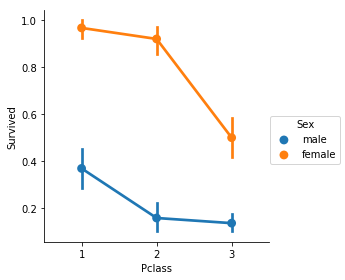

In [83]:
sns.factorplot('Pclass','Survived',data=train_df,hue='Sex')
# Survival rates are much smaller with males than female as we discussed above

Is the survival rate lower if you were going solo?

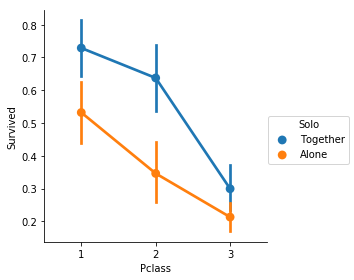

In [88]:
sns.factorplot('Pclass','Survived',data=train_df,hue='Solo')
# The survival rates are much higher if you are together with someone

### Lets look at the age factor

How many died and how many survived in how much of an age?

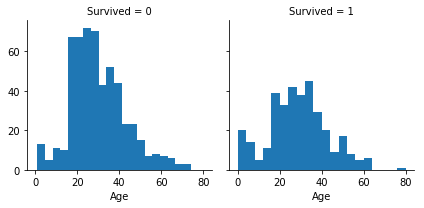

In [100]:
g = sns.FacetGrid(train_df, col='Survived')
g.map(plt.hist, 'Age', bins=20)
# We can see the age distribution of people who survived and who didn't.

We plot the survival rate of age against class

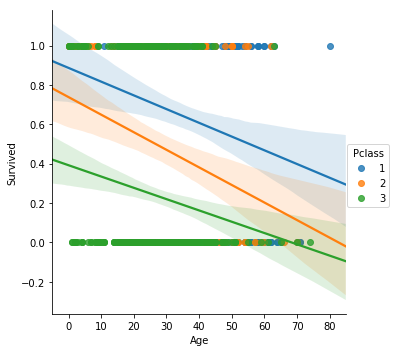

In [93]:
sns.lmplot('Age','Survived',data=train_df,hue='Pclass')
# We can see that the older you get, the less chance of survival you will get for all three classes.

Here's a histogram of the survival rate of each class by age

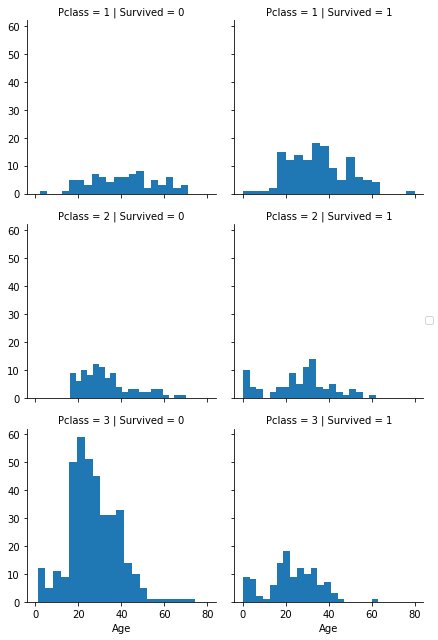

In [112]:
grid = sns.FacetGrid(train_df, col='Survived', row='Pclass')
grid.map(plt.hist, 'Age', bins=20)
grid.add_legend()
# We can see that the 3rd class had the most people who didn't survive, most were in their twenties and thirties

We then plot the survival rate of gender against age

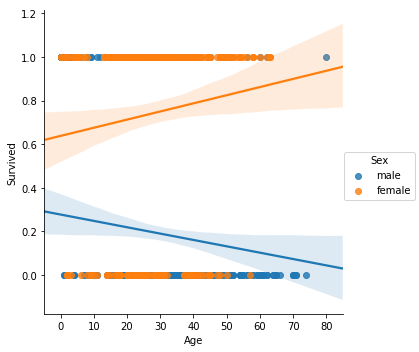

In [96]:
sns.lmplot('Age','Survived',data=train_df,hue='Sex')
# We can see that as women gets older, their survival rate goes up while male decreases

Survival rate of place embarked against age

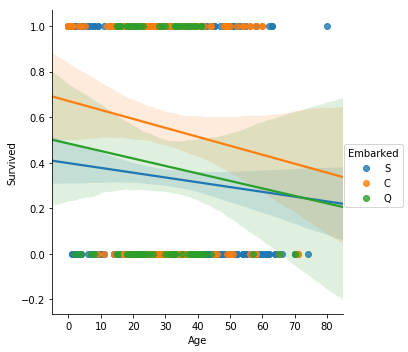

In [99]:
sns.lmplot('Age','Survived',data=train_df,hue='Embarked')
# People who embarked at Cherbourg had a much higher survival rate than the other two

We look into the survival rate for each gender across class

C:\Users\brian\Anaconda3\lib\site-packages\seaborn\axisgrid.py:703: UserWarning: Using the pointplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)
C:\Users\brian\Anaconda3\lib\site-packages\seaborn\axisgrid.py:708: UserWarning: Using the pointplot function without specifying `hue_order` is likely to produce an incorrect plot.
  warnings.warn(warning)


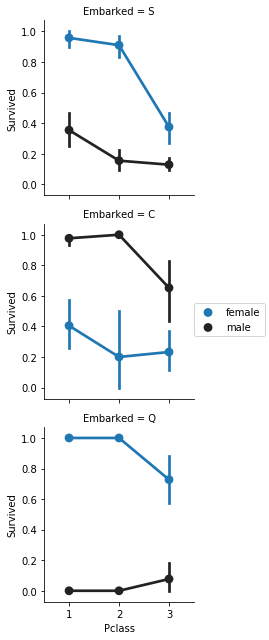

In [114]:
grid = sns.FacetGrid(train_df, row='Embarked')
grid.map(sns.pointplot, 'Pclass', 'Survived', 'Sex')
grid.add_legend()
# We see that the survival rate for male at Cherbourg was surpirsingly higher than female.
# Port of embarkation might have something to do with survival.

## Observations

1. Female does have a higher survival rate than male. 'Sex' feature should be included in the model.
2. 1st class has a much higher survival rate than the 3rd class, so Pclass should be also considered.
3. People who embarked at Cherbourg had a much higher survival rate,  port of embarkation might be correlated with survival rate.

## Data Wrangling 

We need to do some Data Wrangling to do Machine Learning, the data now looks like this.

In [253]:
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Solo
0,1,0,3,"Braund, Mr. Owen Harris",male,22,1,0,A/5 21171,7.2500,NaN,S,Together
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38,1,0,PC 17599,71.2833,C85,C,Together
2,3,1,3,"Heikkinen, Miss. Laina",female,26,0,0,STON/O2. 3101282,7.9250,NaN,S,Alone
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35,1,0,113803,53.1000,C123,S,Together
4,5,0,3,"Allen, Mr. William Henry",male,35,0,0,373450,8.0500,NaN,S,Alone


In [254]:
test_df.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Solo
0,892,3,"Kelly, Mr. James",male,34,0,0,330911,7.8292,NaN,Q,Alone
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47,1,0,363272,7.0000,NaN,S,Together
2,894,2,"Myles, Mr. Thomas Francis",male,62,0,0,240276,9.6875,NaN,Q,Alone
3,895,3,"Wirz, Mr. Albert",male,27,0,0,315154,8.6625,NaN,S,Alone
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22,1,1,3101298,12.2875,NaN,S,Together


We dropped Ticket, Cabin, Parch, SibSp, Name as we don't need them in analyzing

In [301]:
train_df = train_df.drop(['Ticket', 'Cabin','Parch', 'SibSp','Name','PassengerId'], axis=1)
test_df = test_df.drop(['Ticket', 'Cabin','Parch', 'SibSp','Name'], axis=1)
combine = [train_df, test_df]

Changed the 'Sex' variable from Object to Interger

In [302]:
for dataset in combine:
    dataset['Sex'] = dataset['Sex'].map( {'female': 1, 'male': 0} ).astype(int)
# 0: Male, 1: Female

We changed the variable that you are alone or sole into dummies

In [303]:
for dataset in combine:
    dataset['Solo'] = dataset['Solo'].map( {'Alone': 1, 'Together': 0} ).astype(int)
# 0: Together, 1: Alone

Fill in Embark for NAN values and turn Embark (object datatype) into dummies.

In [304]:
freq_port = train_df.Embarked.dropna().mode()[0]
for dataset in combine:
    dataset['Embarked'] = dataset['Embarked'].fillna(freq_port)
for dataset in combine:
    dataset['Embarked'] = dataset['Embarked'].map( {'S': 0, 'C': 1, 'Q': 2} ).astype(int)
# 0 = Southampton, 1 = Cherbourg, 2 = Queenstown

Fill in NAN in Fare with the median in the test dataset

In [305]:
test_df['Fare'].fillna(test_df['Fare'].dropna().median(), inplace=True)
# I filled in all the NAN values with the median so that we can use it in the ML model

Creating Dummies for Fare

In [306]:
pd.qcut(train_df['Fare'], 4).head()
# I decided to cut Fare into 4 categories with the cut function.
# 0: <=7.91, 1: 7.92 - 14.454, 2: 14.455 - 31, 3: > 31 

0     (-0.001, 7.91]
1    (31.0, 512.329]
2     (7.91, 14.454]
3    (31.0, 512.329]
4     (7.91, 14.454]
Name: Fare, dtype: category
Categories (4, interval[float64]): [(-0.001, 7.91] < (7.91, 14.454] < (14.454, 31.0] < (31.0, 512.329]]

In [307]:
for dataset in combine:
    dataset.loc[ dataset['Fare'] <= 7.91, 'Fare'] = 0
    dataset.loc[(dataset['Fare'] > 7.91) & (dataset['Fare'] <= 14.454), 'Fare'] = 1
    dataset.loc[(dataset['Fare'] > 14.454) & (dataset['Fare'] <= 31), 'Fare']   = 2
    dataset.loc[ dataset['Fare'] > 31, 'Fare'] = 3
    dataset['Fare'] = dataset['Fare'].astype(int)
# I have changed the data into categorical data
# 0: <=7.91, 1: 7.92 - 14.454, 2: 14.455 - 31, 3: > 31 

Creating Dummies for Age

In [308]:
pd.qcut(train_df['Age'], 4).head()
# First we cut the data into 4 pieces. From the categories, we will be able to decide.
# our category will be:
# 0: < 20, 1: 20 - 40, 2: 40 - 60, 3: < 60

0    (21.0, 28.0]
1    (37.0, 80.0]
2    (21.0, 28.0]
3    (28.0, 37.0]
4    (28.0, 37.0]
Name: Age, dtype: category
Categories (4, interval[float64]): [(-0.001, 21.0] < (21.0, 28.0] < (28.0, 37.0] < (37.0, 80.0]]

In [309]:
for dataset in combine:    
    dataset.loc[ dataset['Age'] <= 20, 'Age'] = 0
    dataset.loc[(dataset['Age'] > 20) & (dataset['Age'] <= 40), 'Age'] = 1
    dataset.loc[(dataset['Age'] > 40) & (dataset['Age'] <= 60), 'Age'] = 2
    dataset.loc[ dataset['Age'] > 60, 'Age'] = 3
# We have our 4 categories:
# 0: < 20, 1: 20 - 40, 2: 40 - 60, 3: < 60

Take a look at our datasets now

In [310]:
train_df.info()
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 7 columns):
Survived    891 non-null int64
Pclass      891 non-null int64
Sex         891 non-null int32
Age         891 non-null int32
Fare        891 non-null int32
Embarked    891 non-null int32
Solo        891 non-null int32
dtypes: int32(5), int64(2)
memory usage: 31.4 KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 7 columns):
PassengerId    418 non-null int64
Pclass         418 non-null int64
Sex            418 non-null int32
Age            418 non-null int32
Fare           418 non-null int32
Embarked       418 non-null int32
Solo           418 non-null int32
dtypes: int32(5), int64(2)
memory usage: 14.8 KB


In [324]:
train_df.head()

,Survived,Pclass,Sex,Age,Fare,Embarked,Solo
0,0,3,0,1,0,0,0
1,1,1,1,1,3,1,0
2,1,3,1,1,1,0,1
3,1,1,1,1,3,0,0
4,0,3,0,1,1,0,1


In [325]:
test_df.head()

,PassengerId,Pclass,Sex,Age,Fare,Embarked,Solo
0,892,3,0,1,0,2,1
1,893,3,1,2,0,0,0
2,894,2,0,3,1,2,1
3,895,3,0,1,1,0,1
4,896,3,1,1,1,0,0


We're good and ready to go!

## Model & Prediction

We are going to use a supervised learning model.
We first split the training model into data and target.
We would also drop the PassengerId on the X_test to get the same number of columns.

In [321]:
X_train = train_df.drop("Survived", axis=1)
Y_train = train_df["Survived"]
X_test  = test_df.drop("PassengerId", axis=1).copy()
X_train.shape, Y_train.shape, X_test.shape

((891, 6), (891,), (418, 6))

I would like to run a random forest on this dataset. Below is the 4 steps we were taught in class.

In [323]:
from sklearn.ensemble import RandomForestClassifier      # 1. choose model class
model = RandomForestClassifier(n_estimators=100)         # 2. instantiate model
model.fit(X_train, Y_train)                              # 3. fit model to data
Y_model = model.predict(X_test)                          # 4. predict on new data
model.score(X_train, Y_train)
# We got a score of about 85% accuracy with this model.
# We have got our final predicted score in Y_model, we can then print the test_df and Y_model together to see our results.

0.8507295173961841

## Results of Predictions

In [322]:
pd.DataFrame({"PassengerId": test_df["PassengerId"], "Survived": Y_model})

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,0
5,897,0
6,898,1
7,899,0
8,900,1
9,901,0
